# Introduction

**Welcome to team JAKK's final notebook!**
In this project, we wanted to find the BEST neighborhood in Pittsburgh. To do that, we used a metric based on one of America's biggest symbols of freedom: the vehicle.

In our project, we looked at 4 different datasets for 4 different submetrics:
* Police Incidents
* Traffic count
* Bridges
* Speed Hump

All of these relate to vehicular transportation in some shape or form, which we will explain later. We thought of this metric because when a neighborhood is easily able to be traveled through, then that means that it is stress free and leisurely. Additionally, there was a lot of data on metrics that related to vehicular transportation. 

Another metric that we considered pursuing would be a neighborhood's orientation towards nature, which includes parks and greenspaces, but the datasets didn't work out as well for that one.

# The Metric

Our Metric: **Feasabiltiy of Vehicles!**
Our Datasets (plus an explaination):
* Police Incidents (25%)
    * The higher the amount of police incidents, the harder it might be to travel through an area. Additionally, the more likely that your car will be robbed.
* Traffic count (50%)
    * The higher the traffic count, the harder it will be to traverse through a neighborhood. Additionally, more traffic will indicate a noisier, more congested neighborhood.
* Bridges (15%)
    * Pittsburgh is known for its Bridges. Bridges are nice looking. Bridges allow vehicles to go over water channels. More bridges are good.
* Speed Hump (10%)
    * Speed humps could be an indicator of a residential area. More speed humps impede the traffic flow. We want smooth sailling, so less speed humps is better!

Overall, this metric uses the lens of the vehicle to see Pittsburgh through the eyes of its transportation. By doing this, it includes scenery through bridges, congestion through traffic, safety through police incidents, and the ability to go fast through speed humps. 

# The Best Neighborhood

In [41]:
import pandas as pd 
import numpy as np
import math

# DATAFRAME FOR BRIDGES
bridges = pd.read_csv("bridges.csv", index_col = "id")
neighborhood = dict()
for index, row in bridges.iterrows():
    if row["neighborhood"] in neighborhood:
        neighborhood[row["neighborhood"]] = neighborhood[row["neighborhood"]] + 1
    else:
        neighborhood[row["neighborhood"]] = 1
bridgescount = pd.DataFrame(list(neighborhood.items()), columns = ['neighborhood', '# of bridges'])
bridgescount_sorted = bridgescount.sort_values("# of bridges", ascending = False)

In [42]:
# DATAFRAME FOR CRIME
policeIncidents = pd.read_csv("CrimeIncidents.csv") ## import data set
main_df = policeIncidents[['INCIDENTNEIGHBORHOOD','OFFENSES']].copy()
main_df = main_df.sort_values('INCIDENTNEIGHBORHOOD')
neighborhood_incidents = main_df.groupby('INCIDENTNEIGHBORHOOD').count().to_dict(orient='dict')['OFFENSES']
neighborhood_incidents_df = pd.DataFrame(list(neighborhood_incidents.items()), columns = ['neighborhood', 'crime incidents'])

In [73]:
# DATAFRAME FOR TRAFFIC
traffic_count_df = pd.read_csv("Traffic_Count.csv", index_col="id") # use the column named _id as the row index
neighborhoodToCarTraffic_df = traffic_count_df[['neighborhood','average_daily_car_traffic']].copy()
neighborhoodToCarTraffic_df = neighborhoodToCarTraffic_df.sort_values('neighborhood')
import math
newDict = {}
for index,row in neighborhoodToCarTraffic_df.iterrows():
    if(newDict.get(row["neighborhood"]) == None):
        if(not math.isnan(row["average_daily_car_traffic"])):
            newDict[row["neighborhood"]] = (row["average_daily_car_traffic"]/1000)
        else:
            newDict[row["neighborhood"]] = 0
    else:
        if(not math.isnan(row["average_daily_car_traffic"])):
            tempQuant = newDict.get(row["neighborhood"])
            tempQuant += (row["average_daily_car_traffic"]/1000)
            newDict[row["neighborhood"]] = tempQuant   
#convert dictionary of neighborhoods to a dataframe
neighborhoodToTraffic = pd.DataFrame(list(newDict.items()), columns = ['neighborhood', 'total traffic (in thousands)'])
#accessing the last row
last_row = len(neighborhoodToTraffic)
#deleting the last row
neighborhoodToTraffic = neighborhoodToTraffic.drop(neighborhoodToTraffic.index[last_row-1])

In [107]:
# DATAFRAME FOR SPEED BUMPS
af = pd.read_csv("Pitt_SpeedBump.csv")
#Now removing all NaN values to make analysis easier.
af = af.dropna(axis = 0)
#7 rows needed to be dropped. Now let us sort by neighborhoods.
af = af.sort_values(["neighborhood"], axis = 0)
cols = [i for i in list(af.columns) if i not in ["hump_id", "neighborhood", "locator_street", "public_works_division"]]
af_dropped = af.drop(columns = cols, axis = 1)
neighborhood_bumps = dict()
for index, row in af_dropped.iterrows():
    if row["neighborhood"] in neighborhood_bumps:
        neighborhood_bumps[row["neighborhood"]] = neighborhood_bumps[row["neighborhood"]] + 1
    else:
        neighborhood_bumps[row["neighborhood"]] = 1    
bumpcount = pd.DataFrame(list(neighborhood_bumps.items()), columns = ['neighborhood', '# of bumps'])
bumpcount_sorted = bumpcount.sort_values("# of bumps", ascending = False)

In [110]:
main_df = pd.DataFrame(columns = ['neighborhood', 'crime incidents', 'total traffic (in thousands)', '# of bumps', '# of bridges'] )

# main_df = pd.concat([neighborhood_incidents_df, main_df])
# main_df = main_df.sort_values('neighborhood')

# for index, row in main_df.iterrows():
#     neighborhood = row["neighborhood"]
# main_df.head(30)
# pd.concat([bridgescount_sorted, neighborhood_incidents_df, neighborhoodToTraffic, bumpcount_sorted], axis = 1)

main_df = pd.merge(bridgescount_sorted, neighborhood_incidents_df, on = 'neighborhood', how = 'outer')
main_df = pd.merge(main_df, neighborhoodToTraffic, on = 'neighborhood', how = 'outer')
main_df = pd.merge(main_df, bumpcount_sorted, on = 'neighborhood', how = 'outer')

main_df = main_df.sort_values('neighborhood')
final_metric_list = []
for index, row in main_df.iterrows():
    temp = 0
    if(not math.isnan(row['# of bridges']*0.10)):
        temp += row['# of bridges']*0.10
    if(not math.isnan(row['crime incidents']*0.25)):
        temp += row['crime incidents']*0.25
    if(not math.isnan(row['total traffic (in thousands)']*0.5)):
        temp += row['total traffic (in thousands)']*0.5
    if(not math.isnan(row['# of bumps']*0.1)):
        temp += row['# of bumps']*0.1
    if(math.isnan(row['total traffic (in thousands)'])):
        temp = np.nan
    final_metric_list.append(temp)

main_df['Feasability of Vehicles'] = final_metric_list
main_df = main_df.sort_values('Feasability of Vehicles')
main_df.head(30)

,neighborhood,# of bridges,crime incidents,total traffic (in thousands),# of bumps,Feasability of Vehicles
78,New Homestead,NaN,4.0,0.666,NaN,1.3330
29,Allegheny West,2.0,5.0,0.477,NaN,1.6885
24,Swisshelm Park,2.0,6.0,0.000,NaN,1.7000
59,Chartiers City,NaN,2.0,2.571,NaN,1.7855
41,Summer Hill,1.0,5.0,0.937,NaN,1.8185
74,Lincoln Place,NaN,9.0,0.126,NaN,2.3130
85,Spring Garden,NaN,7.0,1.226,NaN,2.3630
86,St. Clair,NaN,5.0,2.436,NaN,2.4680
3,Overbrook,6.0,7.0,0.777,1.0,2.8385
93,Central Northside,NaN,NaN,5.945,NaN,2.9725


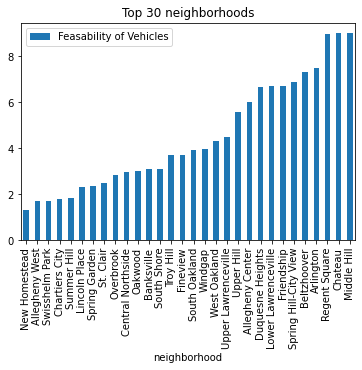

In [109]:
temp_df = main_df.head(30)
temp_df.plot.bar(x = 'neighborhood', y = 'Feasability of Vehicles', title = "Top 30 neighborhoods")

# We have determined New Homestead to be our best neighborhood by the metric of Feasability of Vehicles

As seen in the dataset, New Homestead has the least value for our metric. This is the best value because our metric comprises of bridge count, crime incidents, speed bump count, and traffic count. All of these sub-metrics were weighted accordingly:
* Police Incidents (25%)
* Traffic count (50%)
* Bridges (15%)
* Speed Hump (10%)

For all the sub-metrics, less is better. We want less police incidents in a neighborhood to feel safer to drive. We want less traffic so that it takes less time to drive as well. We want less bridges because bridges can constrict the traffic flow and indicate natural obstacles in transportation. Lastly, we want less speed humps because they slow down the traffic flow.

All of this indicates that our calculated metric score should be sorted from the least to greatest, as the least value of our metric actually has the best feasability of a vehicle.

# Conclusion


Reflect on how the data driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.